In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats, ttest_ind, ttest_1samp
import seaborn as sns
from scipy.stats import variation 

In [2]:
df = pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df["Total Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]

In [7]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100




## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

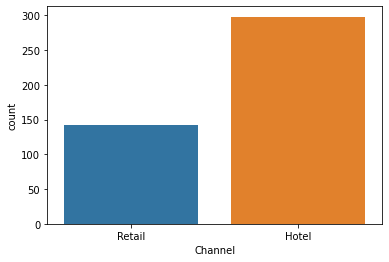

In [8]:
sns.countplot(x = "Channel", data=df)
plt.show()

In [9]:
df.groupby("Channel")["Total Spend"].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total Spend, dtype: int64

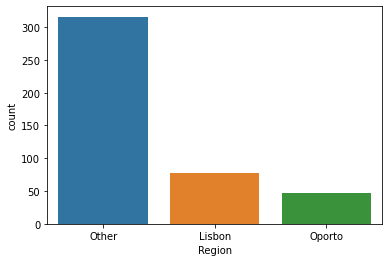

In [10]:
sns.countplot(x = "Region", data=df)
plt.show()

In [11]:
df.groupby("Region")["Total Spend"].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Spend, dtype: int64

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

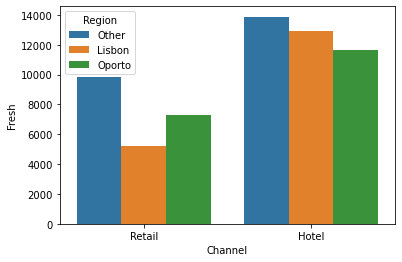

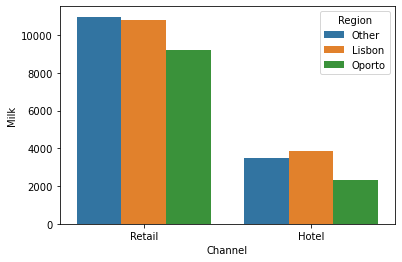

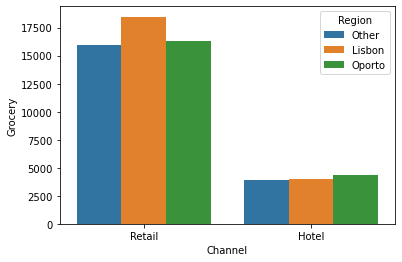

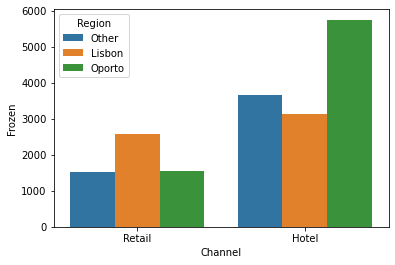

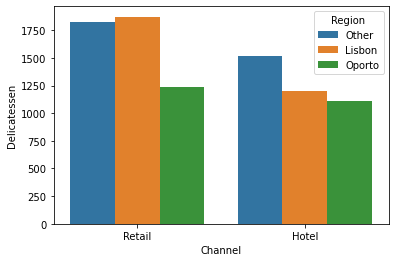

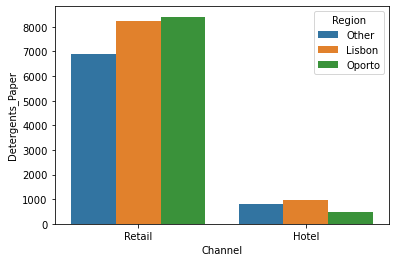

In [12]:
sns.barplot("Channel", "Fresh", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Milk", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Grocery", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Frozen", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Delicatessen", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Detergents_Paper", data=df, hue="Region", ci=None)
plt.show()

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [13]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [14]:
data = [df["Fresh"], df["Milk"], df["Grocery"], df["Frozen"], df["Detergents_Paper"], df["Delicatessen"]] 
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
cv(df)

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
Total Spend         0.793240
dtype: float64

## 1.4 Are there any outliers in the data?

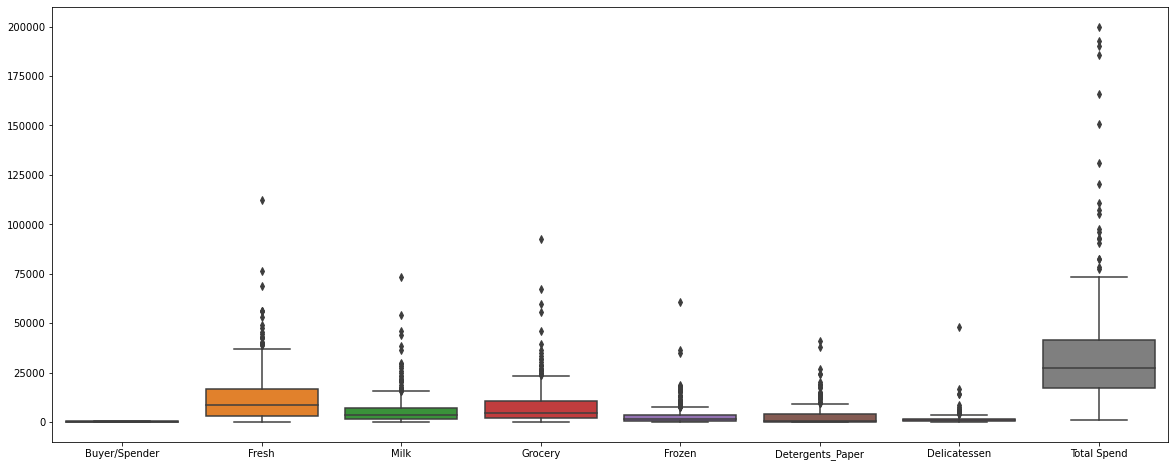

In [15]:
plt.figure(figsize = (20,8))

sns.boxplot(data=df)
plt.show()

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective 

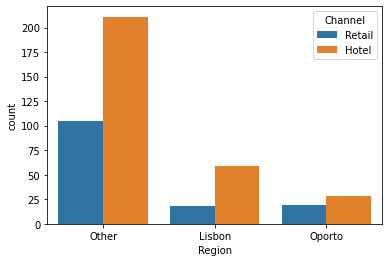

In [16]:
sns.countplot("Region", data=df, hue="Channel")
plt.show()

### Conclusion:
Based on given sample data, the wholesale distributor must focus on below observations:
• Fresh items are more in demand Hotel channel
• Grocery items are more in demand Retail channel
• other region has great demand for Fresh items; hence they must increase the stock of Fresh items.
• Delicatessen items seemed to be less in demand in all the regions. 

# Problem 2

In [17]:
prb2 = pd.read_csv("Survey-1.csv")

In [18]:
prb2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [19]:
prb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [20]:
prb2.describe(include="all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1 Gender and Major

In [21]:
pd.crosstab(prb2["Gender"], prb2["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2. Gender and Grad Intention

In [22]:
pd.crosstab(prb2["Gender"], prb2["Grad Intention"])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3. Gender and Employment

In [23]:
pd.crosstab(prb2["Gender"], prb2["Employment"])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4. Gender and Computer

In [24]:
pd.crosstab(prb2["Gender"], prb2["Computer"])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [25]:
print("Total number of students is", prb2.Gender.count())
print("Total number of male students is", (prb2["Gender"]=="Male").sum())
print(" ")
print("Probability that a randomly selected CMSU student will be a male is", (prb2["Gender"]=="Male").sum()/prb2.Gender.count())

Total number of students is 62
Total number of male students is 29
 
Probability that a randomly selected CMSU student will be a male is 0.46774193548387094


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [26]:
print("Total number of students is", prb2.Gender.count())
print("Total number of male students is", (prb2["Gender"]=="Female").sum())
print(" ")
print("Probability that a randomly selected CMSU student will be a male is", (prb2["Gender"]=="Female").sum()/prb2.Gender.count())

Total number of students is 62
Total number of male students is 33
 
Probability that a randomly selected CMSU student will be a male is 0.532258064516129


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [27]:
pd.crosstab(prb2["Gender"], prb2["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

#### Probability of male_Accounting is 13.8
#### Probability of male_CIS is 3.4
#### Probability of male_Economics_Finance is 13.8
#### Probability of male_International_Business is 6.9
#### Probability of male_Management is 20.7
#### Probability of male_Other is 13.8
#### Probability of male_Retailing_Marketing is 17.2
#### Probability of male_Undecided is 10.3 

## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

#### Probability of female_Accounting is 9.1
#### Probability of female_CIS is 9.1
#### Probability of female_Economics_Finance is 21.2
#### Probability of female_International_Business is 12.1
#### Probability of female_Management is 12.1
#### Probability of female_Other is 9.1
#### Probability of female_Retailing_Marketing is 27.3 
#### Probability of female_Undecided is 0.0

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [28]:
pd.crosstab(prb2["Gender"], prb2["Grad Intention"])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [29]:
print("Probability that a randomly chosen student is a male and intends to graduate is", 17/prb2.Gender.count())

Probability that a randomly chosen student is a male and intends to graduate is 0.27419354838709675


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [30]:
pd.crosstab(prb2["Gender"], prb2["Computer"])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [31]:
print("Probability that a randomly chosen student is a female and does NOT have a laptop is", 4/prb2.Gender.count())

Probability that a randomly chosen student is a female and does NOT have a laptop is 0.06451612903225806


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [32]:
pd.crosstab(prb2["Gender"], prb2["Employment"])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [33]:
print("Probability that a randomly chosen student is either a male or has a full employment is", 0.742)

Probability that a randomly chosen student is either a male or has a full employment is 0.742


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [34]:
pd.crosstab(prb2["Gender"], prb2["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [35]:
print("Probability that given a female student is randomly chosen, she is majoring in international business or management is", 0.121)

Probability that given a female student is randomly chosen, she is majoring in international business or management is 0.121


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [36]:
x = {"No": (9,3), "Yes": (11,17)}
xsub = pd.DataFrame(data=x, index={"Female":0, "Male":1})
xsub

,No,Yes
Female,9,11
Male,3,17


In [37]:
print("Probability of female =", 20)
print("Probability of total students =", 40)
print("Number of student Graduation Intent Yes =", 38)
print("Number of female Graduation Intent Yes =", 11)
print("Probability of female =", 20/40)
print("Probability of student Graduation Intent Yes =", 28/40)
print("P(A)*P(B) =", 28/80)
print("Probability oF Graduation Intent Yes | Female =", 11/20)
print("P(A|B)*P(B) =", 11/40)
print("P(A)*P(B) =", 0.35)
print("P(A|B)*P(B) =", 0.275)

Probability of female = 20
Probability of total students = 40
Number of student Graduation Intent Yes = 38
Number of female Graduation Intent Yes = 11
Probability of female = 0.5
Probability of student Graduation Intent Yes = 0.7
P(A)*P(B) = 0.35
Probability oF Graduation Intent Yes | Female = 0.55
P(A|B)*P(B) = 0.275
P(A)*P(B) = 0.35
P(A|B)*P(B) = 0.275


### The events are dependent

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## Answer the following questions based on the data

### 2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [38]:
print("Number of students' whose GPA is less than 3 is", 17)
print("Probability of number of students’ whose GPA is less than 3 =", 17/prb2.Gender.count())

Number of students' whose GPA is less than 3 is 17
Probability of number of students’ whose GPA is less than 3 = 0.27419354838709675


### 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [39]:
pd.crosstab(prb2["Gender"], prb2["Salary"])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [40]:
print("Probability of male earning more than 50 =", 14/29)
print("Probability of female earning more than 50 =", 18/33)

Probability of male earning more than 50 = 0.4827586206896552
Probability of female earning more than 50 = 0.5454545454545454


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

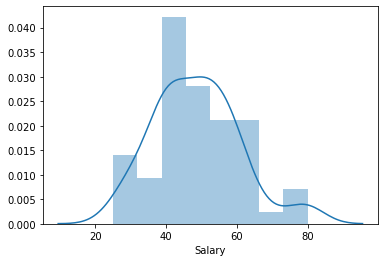

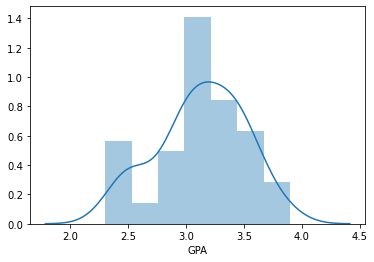

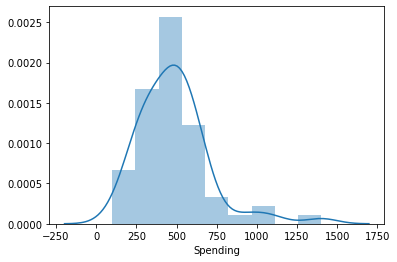

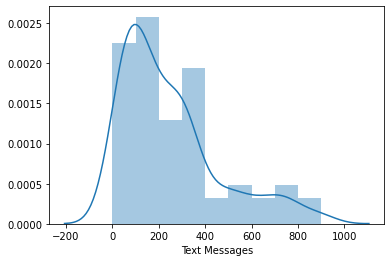

In [41]:
sns.distplot(prb2["Salary"], norm_hist=True)
plt.show()

sns.distplot(prb2["GPA"], norm_hist=True)
plt.show()

sns.distplot(prb2["Spending"], norm_hist=True)
plt.show()

sns.distplot(prb2["Text Messages"], norm_hist=True)
plt.show()

# Problem 3

In [42]:
ab = pd.read_csv("A+&+B+shingles.csv")

In [43]:
ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [44]:
ab.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [45]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### A set

In [46]:
t_statistics, p_value = stats.ttest_1samp(ab["A"], 0.35, nan_policy="omit")

In [47]:
print("T-value is", t_statistics)
print("P value is", p_value/2)

T-value is -1.4735046253382782
P value is 0.07477633144907513


#### B set

In [48]:
t_statistic, p_value = ttest_1samp(ab["B"], 0.35, nan_policy='omit')
print("P value is", p_value/2)

P value is 0.0020904774003191826


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [49]:
t_statistic, p_value = ttest_ind(ab["A"], ab["B"], nan_policy='omit')

In [50]:
p_value

0.2017496571835306